In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
excel_file='CoronavirusFaelleBW.xlsx'
dfi=pd.read_excel(excel_file,sheet_name='Infizierte Coronavirus in BW',header=None)
dft=pd.read_excel(excel_file,sheet_name='Todesfälle Coronavirus in BW',header=None)
kreis_file='Kreise.xlsx'
dfl=pd.read_excel(kreis_file,sheet_name='Landkreise',header=None)
einwohnerzahl=1.107e7

In [19]:
ctyI=np.nan_to_num(np.asarray(dfi))
ctyT=np.nan_to_num(np.asarray(dft))
ctyL=dfl.to_dict()
kreise=ctyL.get(0)
kreis={value:key for key,value in kreise.items()}

<IPython.core.display.Javascript object>


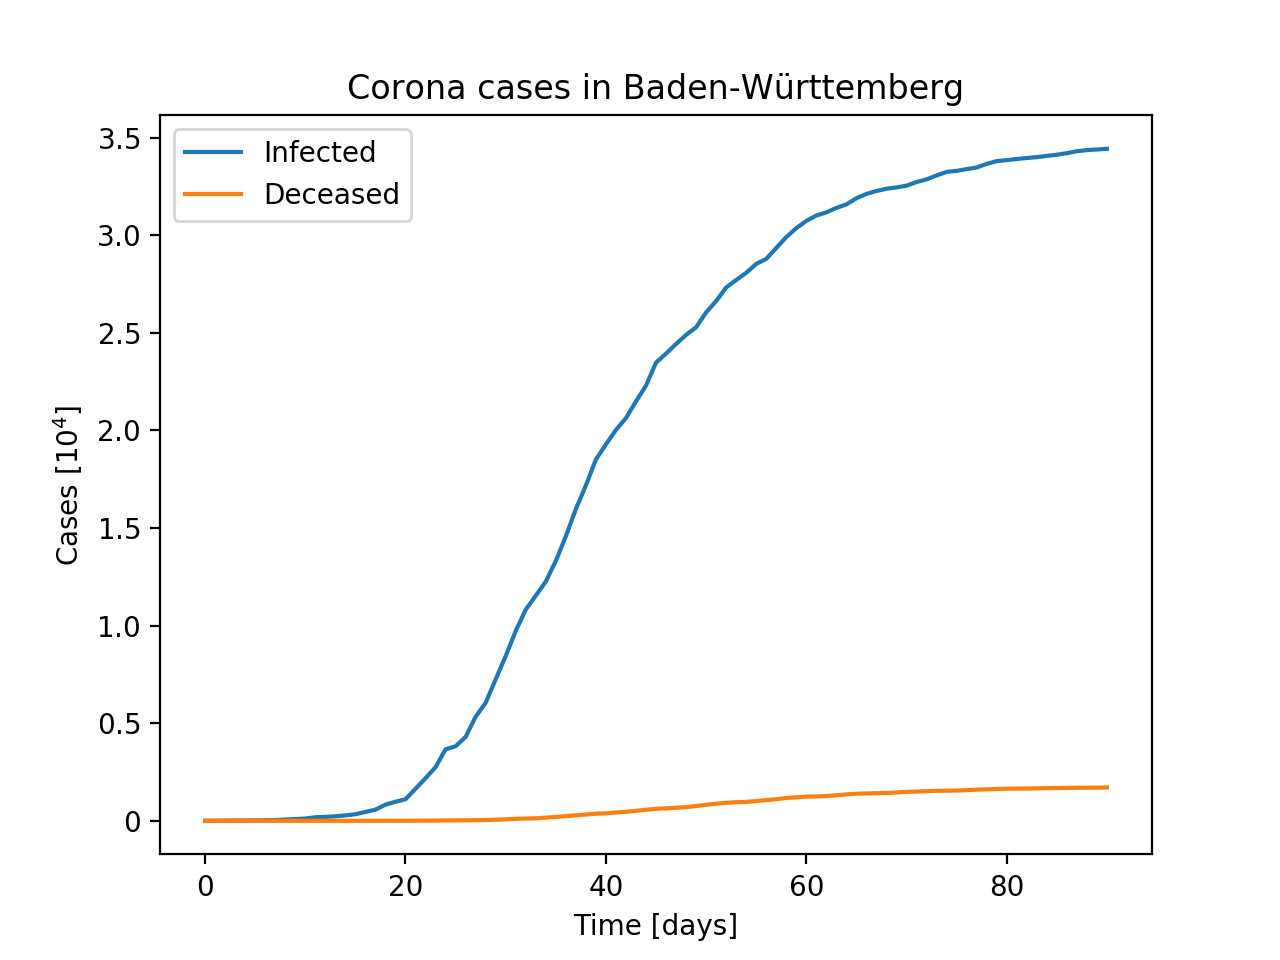

In [33]:
%matplotlib notebook
#proT=1000./einwohnerzahl
proT=1.
yI=np.flip(np.sum(ctyI,axis=0))
yT=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
plt.plot(yI*proT,label='Infected')
plt.plot(yT*proT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Cases [$10^4$]')
plt.yticks([0,0.5e4,1.e4,1.5e4,2.0e4,2.5e4,3.0e4,3.5e4],['0','$0.5$','$1.0$','$1.5$',
                                                         '$2.0$','$2.5$','$3.0$','$3.5$'])
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('BWCases.png')

<IPython.core.display.Javascript object>


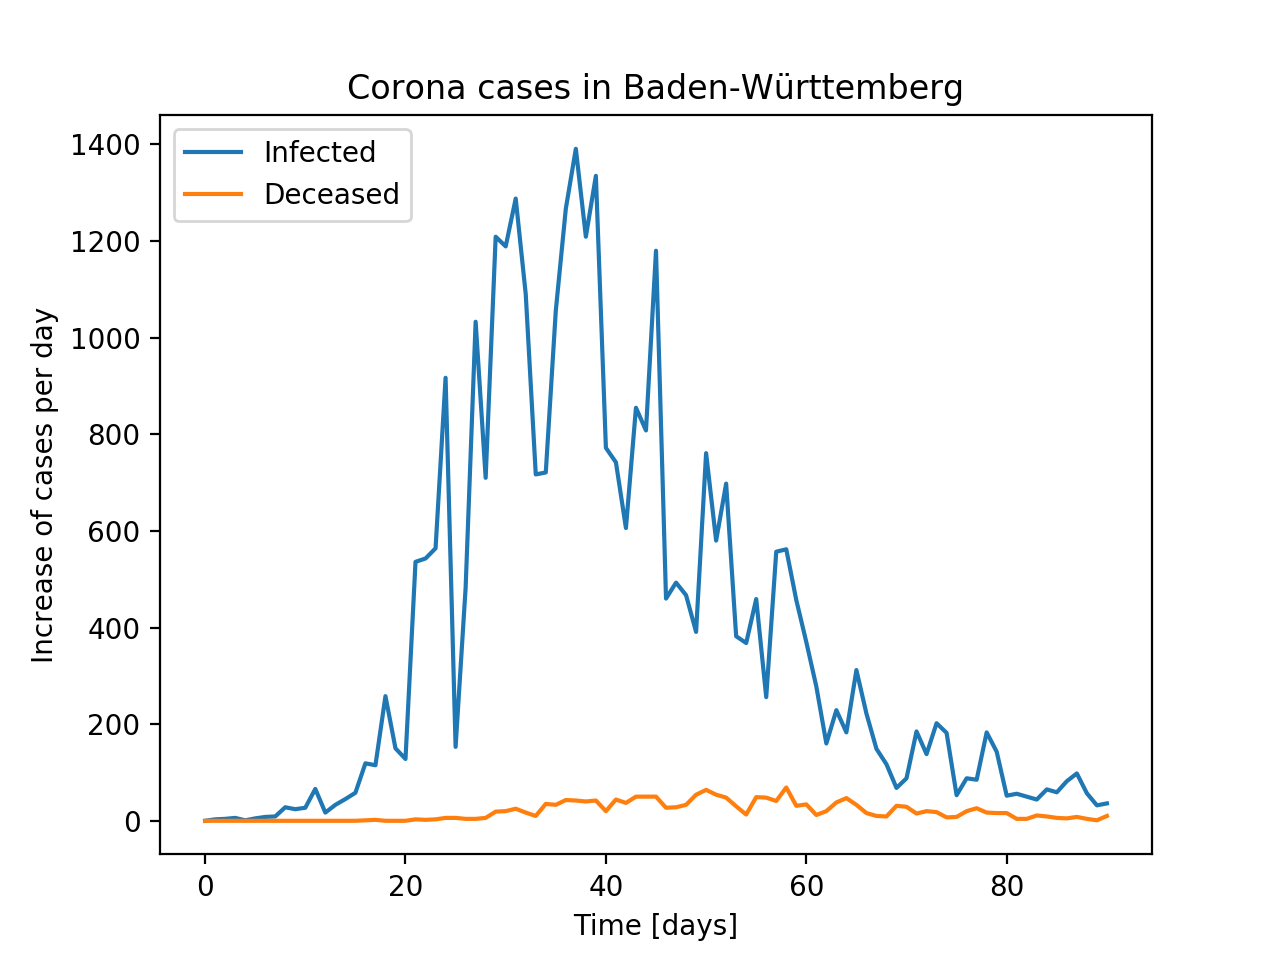

In [23]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [ ]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [26]:
yT[-1]/yI[-1]

0.04957165674459126